# Análise de Dados de Plataformas Digitais

## Objectivo do Notebook
Este notebook explora dados de campanhas de marketing em plataformas digitais (Instagram, TikTok, YouTube, LinkedIn e Google) para identificar padrões e insights que orientem decisões de investimento.

## Etapas do Notebook
- Limpeza e preparação dos dados  
- Análise estatística das principais métricas (CTR, CPC, Conversion Rate, Budget, Conversions)  
- Visualizações para identificação de tendências  
- Relatórios resumidos de desempenho por plataforma

In [1]:
import pandas as pd 
df = pd.read_csv("cleaneData.csv")
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [38]:
df.describe()

,Budget,Duration,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24592.139000,31.692000,25130.92700,2480.360000,388.988301,2.968978,26.856985,0.897000
std,14632.696566,16.542999,14205.44793,1449.470849,1544.579703,15.660721,88.893199,0.304111
min,109.000000,3.000000,98.00000,13.000000,0.232358,0.003153,0.036164,0.000000
25%,11480.000000,17.000000,13225.25000,1222.750000,52.635433,0.468196,4.889723,1.000000
50%,23965.000000,32.000000,25013.50000,2407.000000,102.213286,0.978351,9.847713,1.000000
75%,37953.750000,46.000000,37386.50000,3771.250000,213.586455,1.899861,18.757727,1.000000
max,49950.000000,60.000000,49820.00000,4995.000000,31711.612900,430.370690,1554.121864,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [40]:
df.shape

(1000, 14)

In [41]:
df.dtypes

Campaign_ID         object
Budget               int64
Duration             int64
Platform            object
Content_Type        object
Target_Age          object
Target_Gender       object
Region              object
Clicks               int64
Conversions          int64
CTR                float64
CPC                float64
Conversion_Rate    float64
Success              int64
dtype: object

## Limpeza e Formatação dos Dados

Nesta etapa, o dataset passou por:

- **Remoção de duplicatas:** Eliminação de registos repetidos.
- **Tratamento de valores ausentes:** Exclusão de linhas com dados nulos.
- **Reset do índice:** Reorganização do DataFrame após as remoções.

Essas acções garantem a qualidade e confiabilidade das análises realizadas nas campanhas de marketing digital.

In [ ]:
df = df.drop_duplicates()

df = df.dropna()

df = df.reset_index(drop=True)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.85,0.33,4.38,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.60,0.06,15.50,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.26,4.70,33.69,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.63,2.06,19.62,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.97,0.69,9.02,1


## Análise Exploratória dos Dados (EDA)

Nesta secção, iniciaremos a **Análise Exploratória de Dados (EDA)**, investigando as principais características do dataset de campanhas de marketing digital.  
O objectivo é compreender a distribuição das variáveis, identificar padrões, outliers e possíveis relações entre as métricas das diferentes plataformas.

Serão abordados:

- Estatísticas descritivas das principais métricas (CTR, CPC, Conversion Rate, Budget, Conversions)
- Distribuição das campanhas por plataforma, faixa etária, género e região
- Visualizações para facilitar a identificação de tendências e insights iniciais

Esta etapa é fundamental para direccionar as próximas análises e hipóteses sobre o desempenho das campanhas.

In [ ]:
# Calcular médias de CTR, CPC e Conversion_Rate por plataforma
platform_stats = df.groupby('Platform')[['CTR', 'CPC', 'Conversion_Rate']].mean()

# Contar campanhas bem-sucedidas por plataforma
success_count = df[df['Success'] == 1].groupby('Platform').size().rename('Successful_Campaigns')

# Unir os resultados em um único DataFrame
result = platform_stats.join(success_count).fillna(0)

# Ordenar pela quantidade de campanhas bem-sucedidas (decrescente)
result = result.sort_values(by='Successful_Campaigns', ascending=False)

result

,CTR,CPC,Conversion_Rate,Successful_Campaigns
Platform,,,,
YouTube,346.79,4.58,38.64,199
LinkedIn,324.14,2.95,31.44,188
Facebook,499.20,1.98,18.93,177
Instagram,442.41,3.03,20.75,175
Google,336.21,1.91,21.82,158


## Custo vs Retorno por Plataforma

Nesta secção, buscamos analisar a relação entre o **custo de aquisição de clientes** e o **retorno obtido** em cada plataforma digital. O objectivo é identificar quais plataformas oferecem o melhor equilíbrio entre investimento (CPC, orçamento) e resultados (taxa de conversão, número de conversões).

Com isso, conseguimos responder perguntas como:
- Qual plataforma entrega mais conversões por unidade de orçamento investido?
- Onde o custo por cliente é mais baixo?
- Em quais plataformas o retorno sobre o investimento em campanhas é mais eficiente?

Essas análises são fundamentais para orientar decisões estratégicas de alocação de verba em marketing digital, maximizando o retorno e optimizando os custos das campanhas.

In [45]:
# Custo para gerar um cliente real por plataforma
result['Custo_por_Cliente'] = result['CPC'] * result['Conversion_Rate']
result[['CPC', 'Conversion_Rate', 'Custo_por_Cliente']]

,CPC,Conversion_Rate,Custo_por_Cliente
Platform,,,
YouTube,4.58,38.64,176.97
LinkedIn,2.95,31.44,92.76
Facebook,1.98,18.93,37.45
Instagram,3.03,20.75,62.80
Google,1.91,21.82,41.60


## Impacto de Variáveis Demográficas

A análise detalhada dos dados evidência que **faixa etária**, **género** e **região** exercem forte influência no desempenho das campanhas em cada plataforma digital:

- **Faixa etária:** Grupos como 18-24 e 25-34 anos apresentam taxas de conversão significativamente superiores em determinadas plataformas. Por exemplo, campanhas para 18-24 anos no Instagram e YouTube se destacam em conversão.
- **Género:** O público-alvo feminino ou masculino pode ter desempenho distinto conforme a plataforma. Em algumas plataformas, campanhas voltadas para mulheres apresentam maior taxa de conversão, enquanto em outras o público masculino se destaca.
- **Região:** A localização geográfica impacta os resultados, com países como Reino Unido, Canadá, Índia e Alemanha mostrando variações relevantes nas métricas de sucesso.

Esses factores devem ser considerados na segmentação e personalização das campanhas para potencializar o sucesso e o retorno sobre o investimento em marketing digital.



In [7]:
# Agrupar por Platform, Target_Age, Target_Gender e Region e calcular médias de desempenho
demographic_impact = df.groupby(['Platform', 'Target_Age', 'Target_Gender', 'Region'])[['CTR', 'CPC', 'Conversion_Rate', 'Success']].mean().reset_index()

# Exibir os melhores desempenhos por plataforma e faixa etária
best_by_age = demographic_impact.loc[demographic_impact.groupby(['Platform', 'Target_Age'])['Conversion_Rate'].idxmax()]

# Exibir os melhores desempenhos por plataforma e gênero
best_by_gender = demographic_impact.loc[demographic_impact.groupby(['Platform', 'Target_Gender'])['Conversion_Rate'].idxmax()]

# Exibir os melhores desempenhos por plataforma e região
best_by_region = demographic_impact.loc[demographic_impact.groupby(['Platform', 'Region'])['Conversion_Rate'].idxmax()]

# Exemplo: mostrar melhores faixas etárias por plataforma
best_by_age[['Platform', 'Target_Age', 'Conversion_Rate']]

,Platform,Target_Age,Conversion_Rate
12,Facebook,18-24,170.835014
16,Facebook,25-34,25.972942
28,Facebook,35-44,19.328733
47,Facebook,45-54,30.706817
59,Facebook,55+,80.711627
69,Google,18-24,79.406906
83,Google,25-34,28.236635
99,Google,35-44,207.772550
108,Google,45-54,40.886828
121,Google,55+,218.607955


In [8]:
# Contar o número de campanhas por plataforma e gênero
gender_platform_counts = df.groupby(['Platform', 'Target_Gender']).size().unstack(fill_value=0)

# Encontrar a plataforma preferida por mulheres e homens
preferida_mulheres = gender_platform_counts.loc[:, 'Female'].idxmax()
preferida_homens = gender_platform_counts.loc[:, 'Male'].idxmax()

print("Distribuição de campanhas por plataforma e gênero:")
print(gender_platform_counts)


Distribuição de campanhas por plataforma e gênero:
Target_Gender  All  Female  Male
Platform                        
Facebook        68      66    59
Google          69      56    45
Instagram       65      73    64
LinkedIn        74      66    69
YouTube         70      76    80


## Tipo de Conteúdo com Melhor Performance  

O formato **Story** se destaca como o mais eficaz, com **maior CTR (476,39)** e **taxa de conversão (34,40%)**.  
- **Text** e **Image** têm bom desempenho, mas ficam atrás do Story.  
- **Vídeo** e **Carrossel** convertem menos.  

➡️ Para maximizar resultados, priorizar campanhas em formato **Story**.  


In [4]:
# Comparar desempenho de tipos de conteúdo em termos de engajamento (CTR) e conversões (Conversion_Rate)
content_performance = df.groupby('Content_Type')[['CTR', 'Conversion_Rate']].mean().sort_values(by='Conversion_Rate', ascending=False)

content_performance

,CTR,Conversion_Rate
Content_Type,,
Story,476.390554,34.399185
Text,437.485393,33.294561
Image,261.530995,31.276156
Video,317.383219,18.273886
Carousel,443.348822,15.371897


## Eficiência do Orçamento  

Análise de como cada plataforma transforma **investimento em conversões**.  
A métrica **“Conversões por unidade de orçamento”** compara o retorno de cada canal, destacando onde o investimento é mais eficiente.  


In [5]:
# Calcular a eficiência do orçamento: conversões por unidade de orçamento para cada plataforma
budget_efficiency = df.groupby('Platform').apply(
    lambda x: x['Conversions'].sum() / x['Budget'].sum()
).rename('Conversions_per_Budget').sort_values(ascending=False)


budget_efficiency

/var/folders/lx/jf9nhfvd6z1fsmgk74m3t8180000gn/T/ipykernel_49922/290401338.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  budget_efficiency = df.groupby('Platform').apply(


Platform
Google       0.106248
Facebook     0.104358
LinkedIn     0.103175
YouTube      0.100407
Instagram    0.091653
Name: Conversions_per_Budget, dtype: float64

## Comparação de Custo por Clique (CPC)

A análise do **CPC (Custo por Clique)** permite identificar quais plataformas oferecem maior eficiência no investimento em mídia paga.  
Plataformas com **CPC mais baixo** tendem a gerar mais tráfego pelo mesmo orçamento, enquanto um **CPC mais alto** pode indicar maior concorrência ou segmentação mais específica.  

Comparar o CPC entre plataformas é essencial para optimizar o orçamento e maximizar o retorno sobre investimento (ROI).



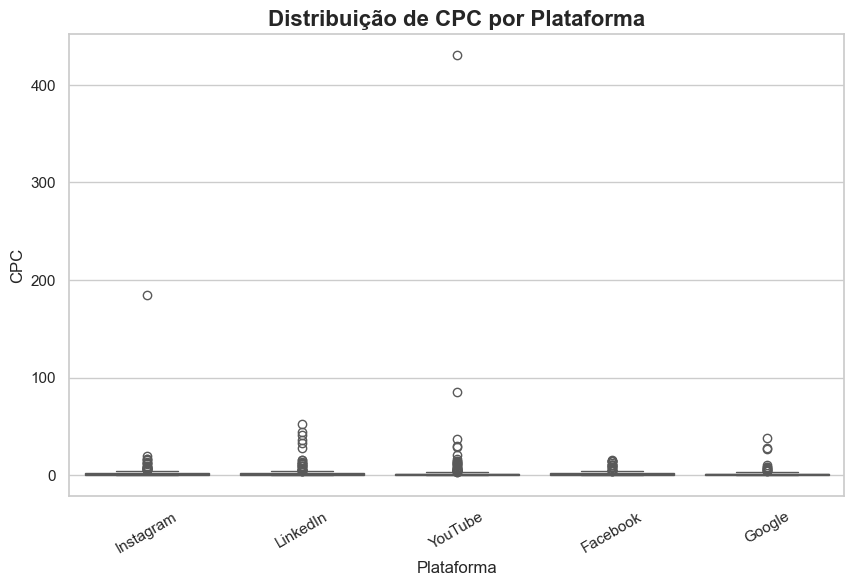

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define estilo e paleta
sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Platform", y="CPC", hue="Platform", dodge=False)

# Personalização
plt.title("Distribuição de CPC por Plataforma", fontsize=16, fontweight="bold")
plt.xlabel("Plataforma", fontsize=12)
plt.ylabel("CPC", fontsize=12)

# Remove legenda redundante (já que o eixo X mostra a plataforma)
plt.legend([],[], frameon=False)

# Rotaciona os rótulos do eixo X se tiverem muitos nomes
plt.xticks(rotation=30)

plt.show()


## Plataforma com Maior Conversão  

Entre todas as plataformas analisadas, o **YouTube** apresenta a **maior taxa de conversão (38,64%)** e o **maior número de campanhas bem-sucedidas (199)**.  

Isso reforça o YouTube como a **plataforma mais eficaz** para geração de leads e vendas, embora tenha um custo por cliente mais elevado em comparação às demais.


/var/folders/lx/jf9nhfvd6z1fsmgk74m3t8180000gn/T/ipykernel_37759/1308674519.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result, x=result.index, y="Conversion_Rate", palette="Blues_d")


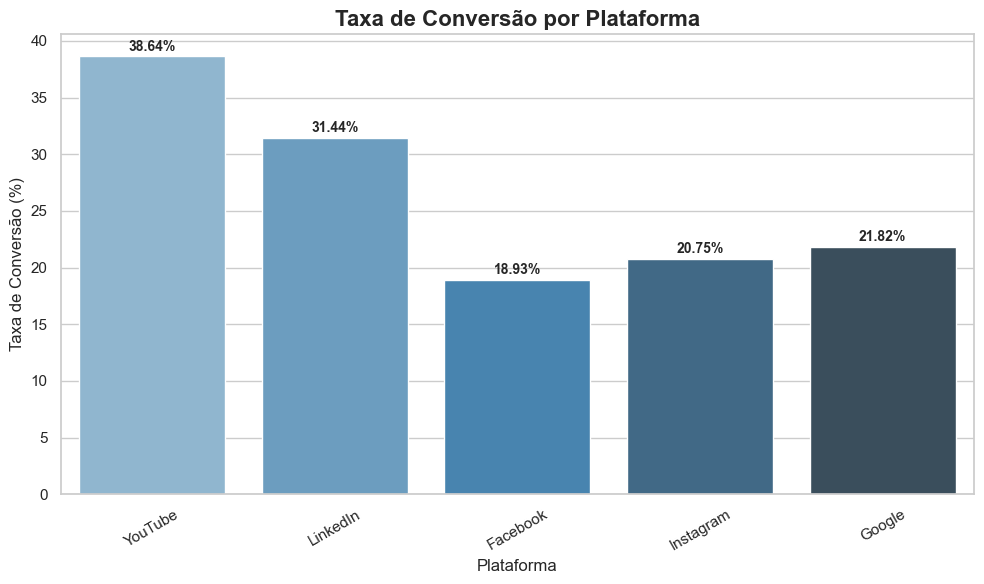

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x=result.index, y="Conversion_Rate", palette="Blues_d")


plt.title("Taxa de Conversão por Plataforma", fontsize=16, fontweight="bold")
plt.ylabel("Taxa de Conversão (%)", fontsize=12)
plt.xlabel("Plataforma", fontsize=12)


for i, v in enumerate(result["Conversion_Rate"]):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10, fontweight="bold")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


O **gráfico de dispersão** evidencia padrões relevantes na relação entre **investimento** e **resultados** em cada plataforma, permitindo identificar níveis de gasto mais eficazes e pontos de maior retorno.


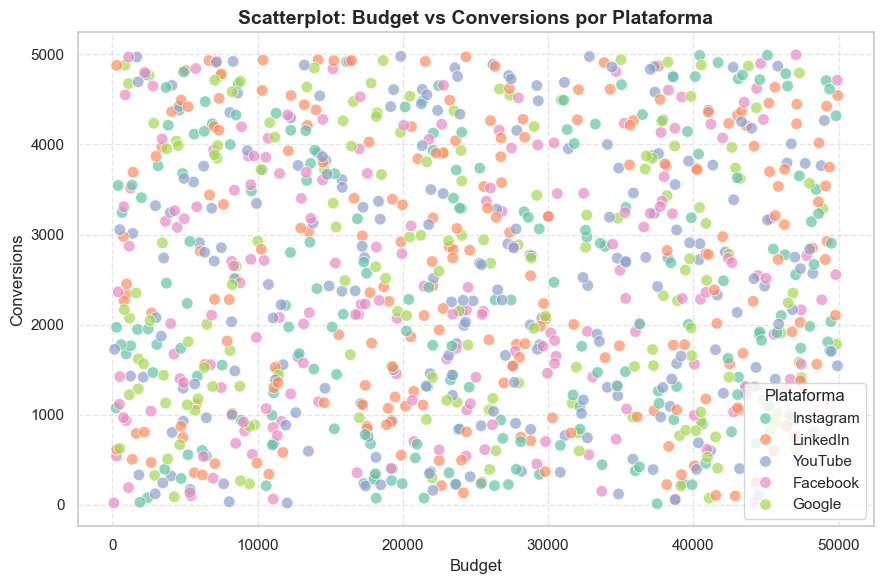

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df,
    x="Budget",
    y="Conversions",
    hue="Platform",
    palette="Set2",      
    alpha=0.7,           
    s=70                 
)

plt.title("Scatterplot: Budget vs Conversions por Plataforma", fontsize=14, weight="bold")
plt.xlabel("Budget", fontsize=12)
plt.ylabel("Conversions", fontsize=12)
plt.legend(title="Plataforma")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Heatmap de Correlação  

O **heatmap de correlação** permite visualizar as relações entre as principais variáveis de desempenho:  
- **Budget**  
- **CTR (Click-Through Rate)**  
- **CPC (Cost per Click)**  
- **Conversion Rate**  

Essa análise ajuda a identificar padrões e possíveis dependências entre investimento e métricas de resultado.


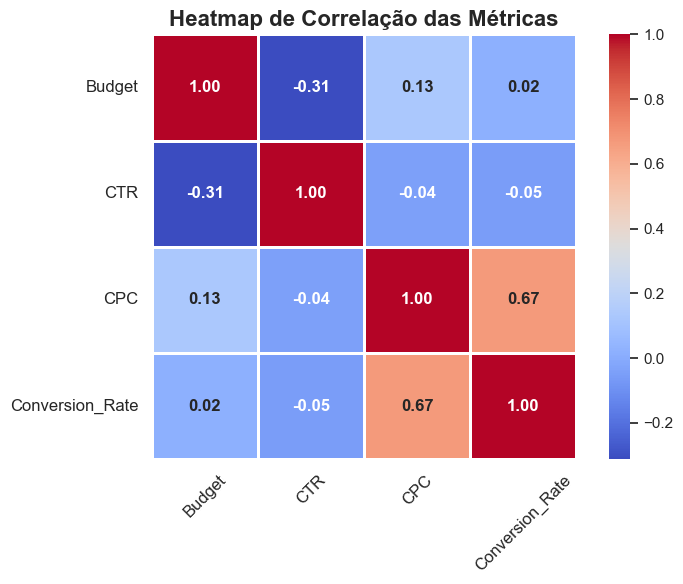

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_cols = ['Budget', 'CTR', 'CPC', 'Conversion_Rate']
corr_matrix = df[corr_cols].corr()


sns.set(style="white")  

plt.figure(figsize=(8, 6))


sns.heatmap(
    corr_matrix, 
    annot=True,                
    fmt=".2f",                 
    cmap='coolwarm',         
    cbar=True,                 
    linewidths=1,            
    linecolor='white',         
    square=True,           
    annot_kws={"size": 12, "weight":"bold"} 
)

plt.title("Heatmap de Correlação das Métricas", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


## Proporção de Campanhas Bem-Sucedidas por Plataforma  

Análise da **distribuição relativa de campanhas com sucesso (Success = 1)** em cada plataforma.  
Esse indicador mostra **qual percentual das campanhas** atingiu os objectivos esperados, permitindo comparar a eficácia entre diferentes canais digitais.  



<Figure size 1000x600 with 0 Axes>

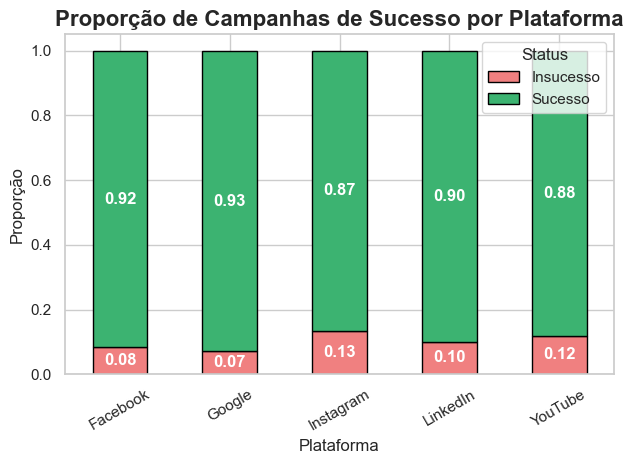

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular proporção de campanhas de sucesso e insucesso por plataforma
success_prop = df.groupby('Platform')['Success'].value_counts(normalize=True).unstack().fillna(0)

# Configurações de estilo
sns.set(style="whitegrid")

# Criar figura
plt.figure(figsize=(10, 6))

# Plot de barras empilhadas
success_prop.plot(
    kind='bar', 
    stacked=True, 
    color=['lightcoral', 'mediumseagreen'], 
    edgecolor='black'
)

# Títulos e labels
plt.title('Proporção de Campanhas de Sucesso por Plataforma', fontsize=16, fontweight='bold')
plt.ylabel('Proporção', fontsize=12)
plt.xlabel('Plataforma', fontsize=12)

# Legenda
plt.legend(['Insucesso', 'Sucesso'], title='Status', fontsize=11, title_fontsize=12)

# Valores em cima das barras
for i, platform in enumerate(success_prop.index):
    insucesso = success_prop.loc[platform, 0]
    sucesso = success_prop.loc[platform, 1]
    plt.text(i, insucesso/2, f"{insucesso:.2f}", ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, insucesso + sucesso/2, f"{sucesso:.2f}", ha='center', va='center', color='white', fontweight='bold')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
